### Import data and useful librairies

In [1294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df.head(3)

restaurant_name  review_number   \
0    le Neuvième Art      626 avis    
1           Aromatic      601 avis    
2  Le Boeuf d'Argent      482 avis    

                                     food_type   \
0  Française  Européenne  Végétariens bienvenus   
1  Française  Européenne  Végétariens bienvenus   
2  Française  Européenne  Végétariens bienvenus   

                            ranking   overallRating    wifi   livraison   \
0  Nº 1 sur 3 058 Restaurants à Lyon             5.0     yes         yes   
1  Nº 2 sur 3 058 Restaurants à Lyon             5.0     yes          no   
2  Nº 3 sur 3 058 Restaurants à Lyon             4.5      no          no   

    average_price                lat                lng       district   
0      85 € -145 €  45.76849365234375   4.85646390914917  69006  Lyon    
1       18 € -41 €  45.77438735961914  4.830961227416992  69004  Lyon    
2  no informations  45.76266098022461  4.826900005340576  69005  Lyon

In [1295]:
len(df)

3058

At this step, we have 3058 entries.

### Cleaning the dataset

The first step is to clean the names of the columns.

In [1296]:
df.columns = ['name', 'review', 'food_type', 'ranking', 'stars', 'wifi', 'delivery', 'price_range', 'lat', 'long', 'district']

Then we remove all the missing data. In our dataset, when an information is missing there is a 'no information' or 'no informations' value. We have to detecte these values and delete the lines in which they are involved

In [1297]:
index_to_remove = []

for index, row in df.iterrows():
    for i in row:
        if i == "no information" or i == "no informations":
            index_to_remove.append(index)
            
index_to_remove_without_duplicate = list(set(index_to_remove))

for index,j in df.iterrows():
    if index in index_to_remove_without_duplicate:
        df.drop(index=index, inplace=True)
        
df.head(3)

name     review  \
0          le Neuvième Art  626 avis    
1                 Aromatic  601 avis    
3  Le Comptoir des Cousins  205 avis    

                                      food_type  \
0  Française  Européenne  Végétariens bienvenus   
1  Française  Européenne  Végétariens bienvenus   
3         Française  Européenne  Sud-américaine   

                             ranking stars wifi delivery  price_range  \
0  Nº 1 sur 3 058 Restaurants à Lyon  5.0   yes      yes  85 € -145 €   
1  Nº 2 sur 3 058 Restaurants à Lyon  5.0   yes       no   18 € -41 €   
3  Nº 4 sur 3 058 Restaurants à Lyon  5.0   yes       no   13 € -28 €   

                 lat               long       district  
0  45.76849365234375   4.85646390914917  69006  Lyon    
1  45.77438735961914  4.830961227416992  69004  Lyon    
3  45.76849365234375   4.85646390914917  69006  Lyon

### Transforming features

Now that there are no more missing data, we have to work on the shape of our data.

We start with the 'review' columns. It has the following shape : '626 avis', which is a string.
But, in order to make some prediction, we have to deal with numerical value.

The next step will be to extract the number 626 from the string '626 avis', and this for the whole column.

Also, we won't need the 'lat' and 'long' columns, so we can juste delete them.

In [1298]:
new_list = []

for i in df["review"]:
    numeric_filter = filter(str.isdigit, i) #takes all digits into an array
    numeric_string = "".join(numeric_filter) #joins all array elements into a string without separators
    if numeric_string != "": #if 
        numeric_result = int(numeric_string) #converts the string into a int
    else:
        numeric_result = 0
    new_list.append(numeric_result) #adds it to new_list

df['review'] = new_list

df.drop('long', 1, inplace=True)
df.drop('lat', 1, inplace=True)

df.head(3)

name  review  \
0          le Neuvième Art     626   
1                 Aromatic     601   
3  Le Comptoir des Cousins     205   

                                      food_type  \
0  Française  Européenne  Végétariens bienvenus   
1  Française  Européenne  Végétariens bienvenus   
3         Française  Européenne  Sud-américaine   

                             ranking stars wifi delivery  price_range  \
0  Nº 1 sur 3 058 Restaurants à Lyon  5.0   yes      yes  85 € -145 €   
1  Nº 2 sur 3 058 Restaurants à Lyon  5.0   yes       no   18 € -41 €   
3  Nº 4 sur 3 058 Restaurants à Lyon  5.0   yes       no   13 € -28 €   

        district  
0  69006  Lyon    
1  69004  Lyon    
3  69006  Lyon

The same goes on for the 'price_range' columun. We want to create 3 new columns from it : min, max and average price.
In order to do so, we have to extract those values from the column, which has the following shape : '85€ - 145€'

Remark : some of the values of the 'price_range' column are wrong (strings). We make sure to delete them.

In [1299]:
for index, row in df['price_range'].items():
    tmp = row.split()
    if (not (tmp[0]).isdigit()):
        df.drop(index=index, inplace=True)
        
list_mean = []
price_min = []
price_max = []

for row in df['price_range']:
    tmp = row.split()
    mean = (int(tmp[0]) + int(tmp[2][1:]))/2
    list_mean.append(mean)
    price_min.append(int(tmp[0]))
    price_max.append(int(tmp[2][1:]))
    
df['average_price'] = list_mean
df['price_min'] = price_min
df['price_max'] = price_max

df.drop('price_range', 1, inplace=True)

df.head(3)

name  review  \
0          le Neuvième Art     626   
1                 Aromatic     601   
3  Le Comptoir des Cousins     205   

                                      food_type  \
0  Française  Européenne  Végétariens bienvenus   
1  Française  Européenne  Végétariens bienvenus   
3         Française  Européenne  Sud-américaine   

                             ranking stars wifi delivery       district  \
0  Nº 1 sur 3 058 Restaurants à Lyon  5.0   yes      yes  69006  Lyon     
1  Nº 2 sur 3 058 Restaurants à Lyon  5.0   yes       no  69004  Lyon     
3  Nº 4 sur 3 058 Restaurants à Lyon  5.0   yes       no  69006  Lyon     

   average_price  price_min  price_max  
0          115.0         85        145  
1           29.5         18         41  
3           20.5         13         28

We apply the same process for the 'ranking' column. It has the following shape : 'Nº 1 sur 3 058 Restaurants à Lyon	' and we just want to keep the '1' information.

But, in the dataset, there are some restaurants from cities near Lyon. We don't want to deal with these values, so we delete it.
Thus, district columun isn't useful since all the restaurant are from the same city, Lyon (the districts don't matter in our analyse).

In [1300]:
for index, row in df['district'].items():
    tmp = row.split()
    if len(tmp) > 2:
        df.drop(index=index, inplace=True)

df.drop('district', 1, inplace=True)

list_rank = []

for row in df['ranking']:
    tmp = row.split()
    i = tmp[0:3]
    numeric_filter = filter(str.isdigit, i) #takes all digits into an array
    numeric_string = "".join(numeric_filter) #joins all array elements into a string without separators
    if numeric_string != "": #if 
        numeric_result = int(numeric_string) #converts the string into a int
        list_rank.append(numeric_result)
        
# this loop allows us to have a logical ranking
for i in range(len(list_rank)):
    if (i != len(list_rank) - 1) and ((list_rank[i] + 1) != list_rank[i+1]):
        list_rank[i+1] = list_rank[i] + 1
        
df['ranking'] = list_rank
df.index = df['ranking']

df.head(3)

name  review  \
ranking                                    
1                le Neuvième Art     626   
2                       Aromatic     601   
3        Le Comptoir des Cousins     205   

                                            food_type  ranking stars wifi  \
ranking                                                                     
1        Française  Européenne  Végétariens bienvenus        1  5.0   yes   
2        Française  Européenne  Végétariens bienvenus        2  5.0   yes   
3               Française  Européenne  Sud-américaine        3  5.0   yes   

        delivery  average_price  price_min  price_max  
ranking                                                
1            yes          115.0         85        145  
2             no           29.5         18         41  
3             no           20.5         13         28

The wifi and delivery columns are bools, but in the dataset they are represent as 'yes' or 'no'. Let's fix that.

In [1301]:
wifi_list = []
delivery_list = []

for row in df['wifi']:
    if row == "yes":
        wifi_list.append(True)
    elif row == "no":
        wifi_list.append(False)
        
for row in df['delivery']:
    if row == "yes":
        delivery_list.append(True)
    elif row == "no":
        delivery_list.append(False)
        
df['wifi'] = wifi_list
df['delivery'] = delivery_list

df.head(3)

name  review  \
ranking                                    
1                le Neuvième Art     626   
2                       Aromatic     601   
3        Le Comptoir des Cousins     205   

                                            food_type  ranking stars  wifi  \
ranking                                                                      
1        Française  Européenne  Végétariens bienvenus        1  5.0   True   
2        Française  Européenne  Végétariens bienvenus        2  5.0   True   
3               Française  Européenne  Sud-américaine        3  5.0   True   

         delivery  average_price  price_min  price_max  
ranking                                                 
1            True          115.0         85        145  
2           False           29.5         18         41  
3           False           20.5         13         28

We now have to prepare our dataset to the future predictions we want to do. We will need features with explicit values, that can be predicted or be used to predict.

Let's start with the 'food_type' column. At this step, it has too many different values. We just have to look at the 3 first values to see it.

What we can do to deal with it is to separate these values into some main types. So, we will have the following food types : French, Italian, American, Chinese, Japanese, Indian and Other.

In [1302]:
food_type_fixed = []

for i in df['food_type']:
    tmp = i.split()
    if 'Française' in tmp:
        food_type_fixed.append('French')
    elif 'Italienne' in tmp:
        food_type_fixed.append('Italian')
    elif 'Japonaise' in tmp:
        food_type_fixed.append('Japanese')
    elif 'Chinoise' in tmp:
        food_type_fixed.append('Chinese')
    elif 'Indienne' in tmp:
        food_type_fixed.append('Indian')
    elif 'Américaine' in tmp:
        food_type_fixed.append('American')
    else:
        food_type_fixed.append('Other')
        
df['food_type'] = food_type_fixed

df.head(3)

name  review food_type  ranking stars  wifi  \
ranking                                                                   
1                le Neuvième Art     626    French        1  5.0   True   
2                       Aromatic     601    French        2  5.0   True   
3        Le Comptoir des Cousins     205    French        3  5.0   True   

         delivery  average_price  price_min  price_max  
ranking                                                 
1            True          115.0         85        145  
2           False           29.5         18         41  
3           False           20.5         13         28

The same statement can be made for the 'stars' column. As it's a float, it can take any value between 0.00 and 5.00, which can affect the quality of our model. But actually the 'stars' column is a string columns. In order to make some predictions on it, we have to get floats values.

Thus, we will create a new features with 5 categories of ranking : 

Excellent : >= 4.5
Good : >= 3.5 and < 4.5
Correct : >= 2.5 and < 3.5
Bad : >=1.5 and < 2.5
Very Bad : < 1.5

In [1303]:
ranking_float = []

for i in df['stars']:
    ranking_float.append(float(i))
    
df['stars'] = ranking_float

overall_ranking_fixed = []

for i in df['stars']:
    if i >= 4.5:
        overall_ranking_fixed.append('Excellent')
    elif i >= 3.5 and i < 4.5 :
        overall_ranking_fixed.append('Good')
    elif i >= 2.5 and i < 3.5:
        overall_ranking_fixed.append('Correct')
    elif i >= 1.5 and i < 2.5:
        overall_ranking_fixed.append('Bad')
    elif i < 1.5:
        overall_ranking_fixed.append('Very Bad')
        
df.insert(5, 'grade', overall_ranking_fixed)

df.head()

name  review food_type  ranking  stars      grade  \
ranking                                                                         
1                le Neuvième Art     626    French        1    5.0  Excellent   
2                       Aromatic     601    French        2    5.0  Excellent   
3        Le Comptoir des Cousins     205    French        3    5.0  Excellent   
4                   Le Book-Lard     204    French        4    5.0  Excellent   
5                   Cercle Rouge     111    French        5    5.0  Excellent   

         wifi  delivery  average_price  price_min  price_max  
ranking                                                       
1        True      True          115.0         85        145  
2        True     False           29.5         18         41  
3        True     False           20.5         13         28  
4        True     False           26.5         13         40  
5        True     False           23.5         12         35

In [1304]:
len(df)

721

At this step, we have only 721 entries left. 2337 entries have been deleted, because of lack of missing or wrong data.

### Visualizing Data

Visualizing data is crucial for recognizing underlying patterns to exploit in the model.
We thus will be able to know is there are some dependecies between the features

<AxesSubplot:xlabel='food_type', ylabel='average_price'>

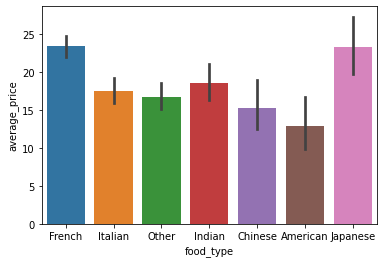

In [1305]:
sns.barplot(x="food_type", y="average_price", data=df)

In [1306]:
sns.barplot(x="grade", y="average_price", data=df)

<AxesSubplot:xlabel='grade', ylabel='average_price'>

<AxesSubplot:xlabel='food_type', ylabel='review'>

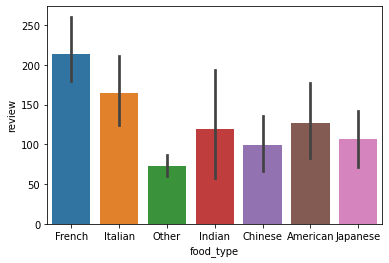

In [1307]:
sns.barplot(x="food_type", y="review", data=df)

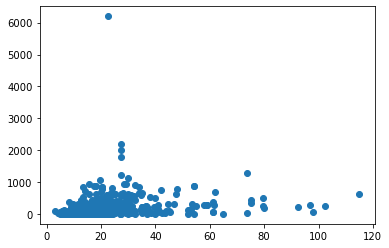

In [1308]:
fig, ax = plt.subplots()
ax.scatter(df['average_price'], df['review'])
plt.show()

<AxesSubplot:xlabel='grade', ylabel='ranking'>

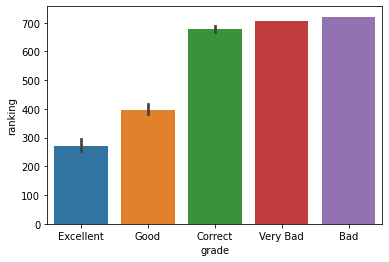

In [1309]:
sns.barplot(x="grade", y="ranking",data=df)

In [1310]:
df_viz = df.copy()

In [1311]:
df_viz.drop('name', 1, inplace=True)
df_viz.drop('food_type', 1, inplace=True)
df_viz.drop('wifi', 1, inplace=True)
df_viz.drop('delivery', 1, inplace=True)
df_viz.drop('price_min', 1, inplace=True)
df_viz.drop('price_max', 1, inplace=True)

df_viz.drop(df_viz[df_viz['review']>6000].index, inplace=True)

In [1312]:
df_viz.head()

review  ranking  stars      grade  average_price
ranking                                                  
1           626        1    5.0  Excellent          115.0
2           601        2    5.0  Excellent           29.5
3           205        3    5.0  Excellent           20.5
4           204        4    5.0  Excellent           26.5
5           111        5    5.0  Excellent           23.5

C:\Users\yaya6\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\yaya6\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\yaya6\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\yaya6\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


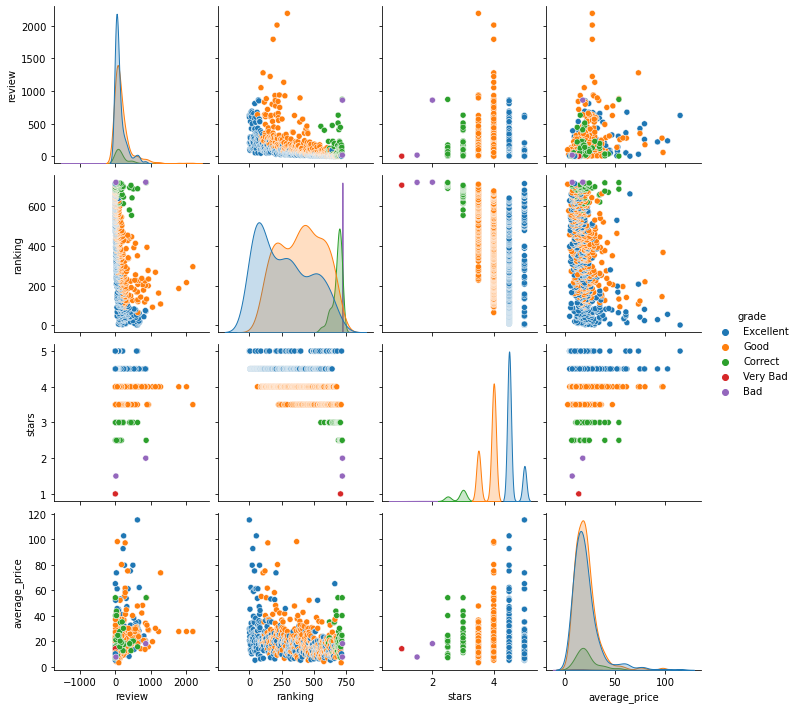

In [1313]:
sns.pairplot(df_viz, hue='grade')

### Predictions

This part will we dedicated to predictions with machine learning models.
In order to do so, we first have to prepare our dataset. We want to start with the regression model, or this model works with numeric value only, and we have strings in our dataset. We have to put a 'code' to convert our strings into intergers.

In [1314]:
df_ml = df.copy()

In [1315]:
food_type = {
    'French' : 1,
    'Italian' : 2,
    'Japanese' : 3,
    'Chinese' : 4,
    'Indian' : 5,
    'American' : 6,
    'Other' : 7
}

grade = {
    'Excellent' : 1,
    'Good' : 2,
    'Correct' : 3,
    'Bad' : 4,
    'Very Bad' : 5
}

In [1316]:
nw_list = []

for i in df_ml['grade']:
    nw_list.append(grade[i])

In [1317]:
nw_list2 = []

for i in df_ml['food_type']:
    nw_list2.append(food_type[i])

In [1318]:
df_ml['grade'] = nw_list
df_ml['food_type'] = nw_list2

We delete the name, which won't be useful for predictions

In [1319]:
df_ml.drop('name', 1, inplace=True)
df_ml.drop('price_min', 1, inplace=True)
df_ml.drop('price_max', 1, inplace=True)

In [1320]:
df_ml.head()

review  food_type  ranking  stars  grade  wifi  delivery  \
ranking                                                             
1           626          1        1    5.0      1  True      True   
2           601          1        2    5.0      1  True     False   
3           205          1        3    5.0      1  True     False   
4           204          1        4    5.0      1  True     False   
5           111          1        5    5.0      1  True     False   

         average_price  
ranking                 
1                115.0  
2                 29.5  
3                 20.5  
4                 26.5  
5                 23.5

The problem with the 'food_type' values is that the computer may think that there is a hierarchy between the values. For example, 6 that stands for American would be better than 1 for French.
In order to avoid any problem in the prediction, here's what we want to do : create a new column for each food type, which will contain either True or False.

In [1321]:
bool_1 = []
bool_2 = []
bool_3 = []
bool_4 = []
bool_5 = []
bool_6 = []
bool_7 = []

for i in df_ml['food_type']:
    if i==1:
        bool_1.append(True)
    else:
        bool_1.append(False)
    if i==2:
        bool_2.append(True)
    else:
        bool_2.append(False)
    if i==3:
        bool_3.append(True)
    else:
        bool_3.append(False)
    if i==4:
        bool_4.append(True)
    else:
        bool_4.append(False)
    if i==5:
        bool_5.append(True)
    else:
        bool_5.append(False)
    if i==6:
        bool_6.append(True)
    else:
        bool_6.append(False)
    if i==7:
        bool_7.append(True)
    else:
        bool_7.append(False)

In [1322]:
df_ml.drop('food_type', 1, inplace=True)

df_ml['French'] = bool_1
df_ml['Italian'] = bool_2
df_ml['Japanese'] = bool_3
df_ml['Chinese'] = bool_4
df_ml['Indian'] = bool_5
df_ml['American'] = bool_6
df_ml['Other'] = bool_7

df_ml.head()

review  ranking  stars  grade  wifi  delivery  average_price  French  \
ranking                                                                         
1           626        1    5.0      1  True      True          115.0    True   
2           601        2    5.0      1  True     False           29.5    True   
3           205        3    5.0      1  True     False           20.5    True   
4           204        4    5.0      1  True     False           26.5    True   
5           111        5    5.0      1  True     False           23.5    True   

         Italian  Japanese  Chinese  Indian  American  Other  
ranking                                                       
1          False     False    False   False     False  False  
2          False     False    False   False     False  False  
3          False     False    False   False     False  False  
4          False     False    False   False     False  False  
5          False     False    False   False     False  False

We want to make sure that we take the best test size. In order to do that, we will test our scores with different test sizes, from 20% to 60%. The test size with the best result will be the one we will keep for the prediction

In [1323]:
root = {}

In [1324]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df_ml['stars'].values
x = df_ml.drop('stars', 1).values

for i in range(20,60):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = i/100, random_state=42)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    root[i/100] = reg.score(X_test, y_test)

In [1325]:
ideal_value = max(root, key=root.get)

In [1326]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = ideal_value, random_state=50)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8552233943703191
Root Mean Squared Error: 0.21905780345451145


Let's calculate the percentage of error of our model

In [1327]:
pred = reg.predict(x)

error = (abs(df_ml['stars'] - pred))/df_ml['stars']*100

In [1328]:
sum(error)/len(error)

4.955076315895614

In average, we have 4.96% of error in our predictions. That's a really good result, that can lead to useful cases.

With the first Linear Regression model, we managed to predict the overall ranking of the restaurant with 86% of accuracy, which is great.
We'll now try to apply other models to our dataset to find out if we can have a better score.

In [1329]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn import linear_model

In [1330]:
models = [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=1.2), ElasticNet(alpha=0.01), BayesianRidge(), ARDRegression(), OrthogonalMatchingPursuit(), TweedieRegressor(max_iter=300), TheilSenRegressor(), HuberRegressor(max_iter=3000), RandomForestRegressor(max_depth=8), linear_model.Lars(n_nonzero_coefs=7, normalize=False), GradientBoostingRegressor(random_state=3)]

In [1331]:
models_name = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'BayesianRidge', 'ARDRegression', 'OrthogonalMatchingPursuit', 'TweedieRegressor', 'TheilSenRegressor', 'HuberRegressor', 'RandomForestRegressor', 'LARS', 'GradientBoostingRegressor']

In [1332]:
values_r2 = []
values_root = []

In [1333]:
for model in models:
    y = df_ml['stars'].values
    x = df_ml.drop('stars', 1).values

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.34, random_state=42)

    reg = model
    reg.fit(X_train, y_train)

    from sklearn.metrics import mean_squared_error

    y_pred = reg.predict(X_test)

    values_r2.append(reg.score(X_test, y_test))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    values_root.append(rmse)

In [1334]:
r2 = pd.DataFrame(values_r2, columns=['r2'])
r2['model'] = models_name

rt = pd.DataFrame(values_root, columns=['RootMeanSquaredError'])
rt['model'] = models_name

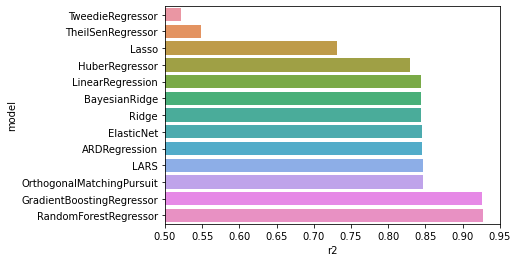

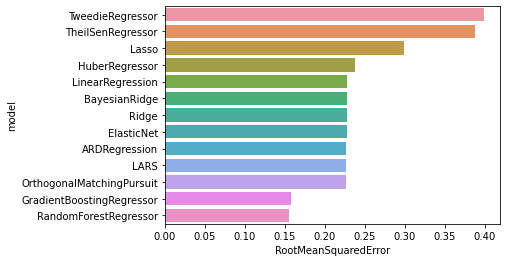

In [1337]:
sns.barplot(x="r2", y="model",data=r2, order=r2.sort_values(['r2']).model)
plt.xlim(0.5,0.95)
plt.show()

sns.barplot(x="RootMeanSquaredError", y="model",data=rt, order=rt.sort_values(['RootMeanSquaredError']).model.iloc[::-1])
#plt.xlim(0.1,0.4)
plt.show()

In [1342]:
#erreur avec le model Random forest : 

y = df_ml['stars'].values
x = df_ml.drop('stars', 1).values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.34, random_state=42)

reg = RandomForestRegressor(max_depth=8)
reg.fit(X_train, y_train)

pred = reg.predict(x)

error = (abs(df_ml['stars'] - pred))/df_ml['stars']*100

In [1343]:
sum(error)/len(error)

1.7808171261477723

In [1344]:
df_poubelle = df_ml.copy()

In [1347]:
df_poubelle['%_error'] = error
df_poubelle['prediction'] = pred

In [1349]:
df_poubelle.head(200)

review  ranking  stars  grade   wifi  delivery  average_price  \
ranking                                                                  
1           626        1    5.0      1   True      True          115.0   
2           601        2    5.0      1   True     False           29.5   
3           205        3    5.0      1   True     False           20.5   
4           204        4    5.0      1   True     False           26.5   
5           111        5    5.0      1   True     False           23.5   
...         ...      ...    ...    ...    ...       ...            ...   
196          87      196    4.5      1   True      True           13.5   
197          79      197    4.5      1  False     False           52.5   
198          72      198    4.5      1  False      True            6.0   
199         932      199    4.0      2   True     False           15.5   
200         130      200    4.5      1   True     False           18.5   

         French  Italian  Japanese  Chinese  Indian  American  Other  \
ranking                                                                
1          True    False     False    False   False     False  False   
2          True    False     False    False   False     False  False   
3          True    False     False    False   False     False  False   
4          True    False     False    False   False     False  False   
5          True    False     False    False   False     False  False   
...         ...      ...       ...      ...     ...       ...    ...   
196       False    False     False    False   False     False   True   
197        True    False     False    False   False     False  False   
198        True    False     False    False   False     False  False   
199        True    False     False    False   False     False  False   
200        True    False     False    False   False     False  False   

          %_error  prediction  
ranking                        
1        0.000000     5.00000  
2        0.000000     5.00000  
3        0.100000     4.99500  
4        0.000000     5.00000  
5        0.100000     4.99500  
...           ...         ...  
196      0.000000     4.50000  
197      0.497340     4.52238  
198      0.111111     4.50500  
199      1.125000     3.95500  
200      0.000000     4.50000  

[200 rows x 16 columns]